# Implementace domácího úkolu - rybí regrese 

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

- Načtěte si data pomocí pandas, vyberte požadované sloupce, které budete používat. 


In [2]:
fish_data = pd.read_csv("fish_data.csv", index_col=0)
fish_data = fish_data.drop(columns=["ID"])
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


- Zvol si sloupec, který budeš používat jako odezvu (**Weight**). Do proměnné **X** ulož sloupce, které budeš používat jako příznaky, do proměnné **y** sloupec s odezvou.

*V teorii strojového učení se vstupy modelu (příznaky, vstupní proměnné) typicky označují písmenem X a výstupy písmenem y. Takto se často označují i proměnné v kódu. X představuje matici (neboli tabulku), kde každý řádek odpovídá jednomu datovému vzorku a každý sloupec jednomu příznaku (vstupní proměnné). y je vektor, neboli jeden sloupec s odezvou.*

In [3]:
y = fish_data["Weight"]
X = fish_data.drop(columns=["Weight"])

- Rozděl data na trénovací a testovací. Všimni si, že máme v datech různé druhy ryb, na co si dát pozor? 

*Metoda  [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split)  nám data rozdělí náhodně na trénovací a testovací sadu. Velikost testovací množiny můžeme specifikovat parametrem test_size, jeho přednastavená (default) hodnota je 0.25, t. j. 25%.*

In [4]:
from sklearn.model_selection import train_test_split 

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X["Species"])

+ Překóduj potřebné sloupce pomocí OneHotEncoding. 

In [5]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["Species"] 

encoder = OneHotEncoder()
encoder.fit(X_train_raw[categorical_columns])
column_names = encoder.get_feature_names_out()
  
def transform_species(X_raw):
    X_res = X_raw.drop(columns=["Species"])
    X_res = X_res.reindex(columns=list(X_res.columns)+list(column_names))
    X_res[list(column_names)] = encoder.transform(X_raw[categorical_columns]).toarray() 
    return X_res

X_train_onehot = transform_species(X_train_raw)
X_test_onehot = transform_species(X_test_raw)
X_train_onehot

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
11,28.7,31.0,36.2,14.3714,4.8146,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45,20.5,22.5,25.3,7.0334,3.8203,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,32.0,35.0,40.6,16.3618,6.0900,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87,20.0,22.0,23.5,5.6400,3.5250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74,13.8,15.0,16.0,3.8240,2.4320,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,39.0,42.0,44.6,12.8002,6.8684,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,33.5,37.0,42.6,18.9570,6.6030,1.0,0.0,0.0,0.0,0.0,0.0,0.0
130,32.7,35.0,38.8,5.9364,4.3844,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,11.4,12.0,13.2,2.2044,1.1484,0.0,0.0,0.0,0.0,0.0,1.0,0.0


+ Přeškáluj sloupce pomocí StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_onehot)

X_train = scaler.transform(X_train_onehot)
X_test = scaler.transform(X_test_onehot)

- Vyber si několik regresních modelů a zkus je použít. 

Pro dnešek možno zkusit:

  - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
 
  - [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
      + hyperparametry: 
          * alpha, float, default=1.0 
 
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)        
     + hyperparametry:
          * kernel, default rbf, one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
          * C, float, optional (default=1.0)

# Odbočka: co jsou to ty *hyper-parametry*? 

U příkladů s černými krabičkami v první hodině jsme si (za vašimi zády) několikrát trochu pomohli a 
krabičce jsme předali na začátku nějaké parametry. Krabička totiž často umožňuje uživateli, aby si ji nakonfiguroval. V terminologii krabiček si můžeme představit, že krabička má na sobě různé páčky, kterými se dá seřídit. Těmito páčkami se nastavují tzv. **hyper-parametry** modelu. Všechny modely, které najdeš v knihovně Scikit-learn, mají nějaké výchozí nastavení a půjdou použít i bez toho, aby ses nastavením těchto hyper-parametrů zabývala.
V případě, že model nedává uspokojivý výsledek, můžeš zkusit tyto parametry upravit, např. vyzkoušet několik různých nastavení a porovnat hodnotu metriky na testovací množině.

U seznamu výše máme některé hyperparametry uvedené. Parametry často souvisejí s regularizací (výše *alpha*, *C*). **Regularizace** znamená, že model kromě toho, že se snaží nafitovat tak, aby odpovídal datům (dával správné odpovědi), zohledňuje nějaké další kriterium. Typicky toto kritérium hlídá, aby výstup modelu moc neosciloval, apod. Podobně jako jsi v příkladu s krajinou říkala, že řešení volíš tak, aby bylo *plynulé*, *hezké*, *odpovídalo obvyklým* krajinám. 

Proces výběru modelu včetně jeho parametrů se nazývá **model selection**, v knihovně Scikit-learn najdeš nástroje, které ti mohou pomoci, pod heslem [Model selection](https://scikit-learn.org/stable/model_selection.html).

In [7]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

In [8]:
model_zoo = {
    "linear_regression": LinearRegression(),
    "lasso_var1": Lasso(alpha=1.0),
    "lasso_var2": Lasso(alpha=1e-03),
    "SVR_rbf": SVR(kernel="rbf", C=1e04),
    "SVR_poly": SVR(kernel="poly",C=1e04),
}

+ K trénovaní (fitování) slouží metoda `fit`, k predikci pro nové vzory metoda `predict`. 
```
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
```

+ Metriku nemusíš programovat, k dispozici máš `mean_absolute_error`, `mean_squared_error` a `r2_score`.
```
  metrika = mean_absolute_error(y_test, pred)
```  

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def fit_and_eval(X_train, y_train, X_test, y_test, model, name):
    """ 1. Natrénuje model na trénovací množině.
        2. Spočte hodnoty metrik na trénovací i testovací množině.
        vrátí slovník ve tvaru {"název metriky": hodnota} 
    """ 
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return {
        "MAE_train": mean_absolute_error(y_train, y_train_pred),
        "MSE_train": mean_squared_error(y_train, y_train_pred),
        "MAE_test": mean_absolute_error(y_test, y_test_pred),
        "MSE_test": mean_squared_error(y_test, y_test_pred)
    }

In [10]:
results = []
for name, model in model_zoo.items(): 
    result = fit_and_eval(X_train, y_train, X_test, y_test, model, name)
    result["model"] = name
    results.append(result)
    
pd.DataFrame(results)

/home/petra/pydata-course/podzim_2022/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+03, tolerance: 1.127e+03
  model = cd_fast.enet_coordinate_descent(
/home/petra/pydata-course/podzim_2022/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.308e+05, tolerance: 1.127e+03
  model = cd_fast.enet_coordinate_descent(


,MAE_train,MSE_train,MAE_test,MSE_test,model
0,65.075967,7438.347512,64.076083,7327.508225,linear_regression
1,65.457444,7999.732745,67.698824,7481.296957,lasso_var1
2,65.143581,7723.470509,66.929641,7734.792363,lasso_var2
3,14.885810,1083.558622,29.440300,1983.156024,SVR_rbf
4,15.792914,1263.177350,37.137981,3351.282774,SVR_poly


Naučili jsme několik modelů. Zamysli se teď na chvilku, který by sis vybrala a proč. 
Označme si jej jako `best_model`.  Můžeš si i zkusit pohrát s hyperparametry a zvolit jiné nastavení.

In [11]:
# doplň jméno modelu, který jsi vybrala

best_model = model_zoo["SVR_rbf"]

# A pozor, překvapení ...  další testovací množina

Data jsme si rozdělili na trénovací a testovací. Trénovací jsme použili na učení modelu. 
**Ale pozor!** Testovací množinu jsme použili k výběru modelu. Metrika na testovací množině nám tedy 
nedává nezávislý odhad toho, jak se bude náš model chovat na neznámých datech. Byl totiž vybrán tak, 
aby dával dobré výsledky na testovací množině. 

Testovací množina nám slouží jako odhad generalizačních schopností modelu. Neměla by ale být použita ani při učení,
ani při výběru modelu. Část, kterou si oddělíme na "testování" pro účely výběru modelu, nazýváme správně 
**validační** množina. 
**Pozor:** Pokud jsme ale tuto validační množinu použili k výběru modelu, nesmíme ji používat k samotnému hodnocení generalizačních schopností tohoto modelu. 

A proto teď přichází opravdová testovací data, načtěte je ze souboru `fish_data_test.csv`.

In [12]:
test_data = pd.read_csv("fish_data_test.csv", index_col=0)

test_data.pop("ID")
y_real_test = test_data.pop("Weight")
X_real_test = test_data 

X_real_test = transform_species(X_real_test)
X_real_test_scaled = scaler.transform(X_real_test)

In [13]:
y_pred_test = best_model.predict(X_real_test_scaled)

print(f"MAE {mean_absolute_error(y_real_test, y_pred_test):.3f}")
print(f"MSE {mean_squared_error(y_real_test, y_pred_test):.3f}")

MAE 37.263
MSE 4050.929


In [14]:
for weight, predicted_weight in zip(y_real_test, y_pred_test):
    print(f"{weight:>10.1f}     {predicted_weight:>10.1f}")

     650.0          523.9
     620.0          616.7
     680.0          635.0
     700.0          698.0
     920.0          897.5
      69.0           66.5
     120.0          110.6
       0.0          120.7
     150.0          112.4
     160.0          140.6
     169.0          194.5
     161.0          166.5
     272.0          294.8
     306.0          336.7
    1000.0          945.0
      90.0           98.0
     150.0          157.9
     140.0          167.7
     500.0          493.0
       5.9           71.0
      32.0           31.4
     100.0           83.5
     115.0          113.1
     110.0          149.5
     170.0          161.2
     188.0          196.0
     180.0          180.8
     250.0          252.3
     300.0          273.6
     320.0          293.0
     700.0          622.9
    1000.0         1240.9
    1000.0         1170.2
     950.0          962.9
    1650.0         1586.2
      19.7           20.8


# Visualizace na závěr 

+ Pro představu si zobrazme závislost váhy ryby na délce Length3. Zobrazíme zvlášt pro různé druhy, tedy např. pro Bream a Roach.  

In [15]:
is_bream = X_real_test["Species_Bream"] == 1 
bream = X_real_test[is_bream]["Length3"]

bream_weights = y_real_test[is_bream]
predicted_bream_weights = best_model.predict(X_real_test_scaled[is_bream])

is_roach = X_real_test["Species_Roach"] == 1
roach = X_real_test[is_roach]["Length3"]
roach_weights = y_real_test[is_roach]
predicted_roach_weights = best_model.predict(X_real_test_scaled[is_roach])

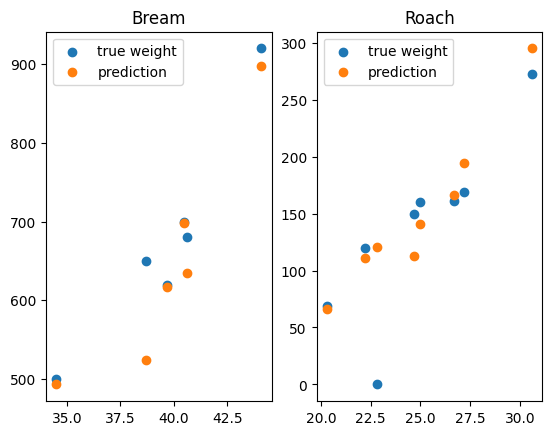

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(1, 2)

ax[0].scatter(bream, bream_weights, label="true weight");
ax[0].scatter(bream, predicted_bream_weights, label="prediction");
ax[0].legend()
ax[0].set_title("Bream")

ax[1].scatter(roach, roach_weights, label="true weight");
ax[1].scatter(roach, predicted_roach_weights, label="prediction");
ax[1].legend()
ax[1].set_title("Roach");